In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = df.drop(['Ticket','Cabin','Name'],axis=1)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
mean = df['Age'].mean()
mean

29.69911764705882

In [9]:
df["Age"].fillna(mean,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.shape

(889, 9)

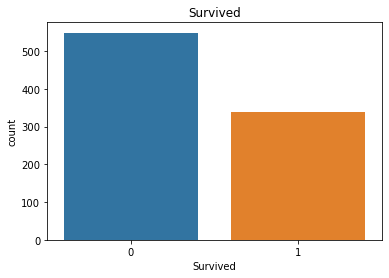

In [13]:
sns.countplot(df["Survived"])
plt.title("Survived")
plt.show()

1=Survived, 0=Not-survived

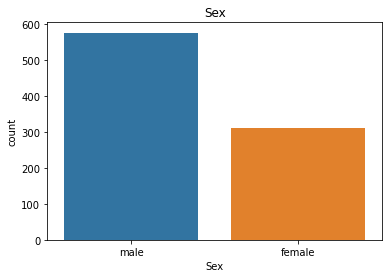

In [14]:
sns.countplot(df["Sex"])
plt.title("Sex")
plt.show()

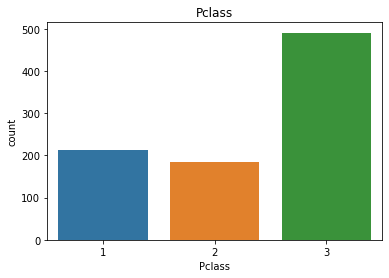

In [15]:
sns.countplot(df["Pclass"])
plt.title("Pclass")
plt.show()

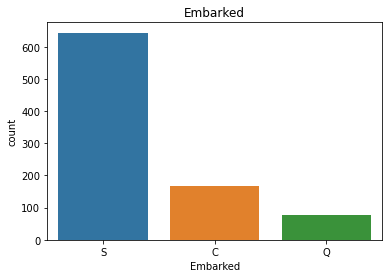

In [16]:
sns.countplot(df["Embarked"])
plt.title("Embarked")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

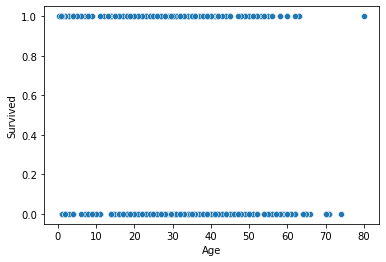

In [17]:
sns.scatterplot(x="Age",y="Survived",data=df)

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


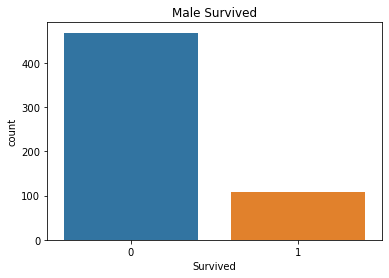

In [19]:
sns.countplot(df.Survived[df.Sex == 'male'])
plt.title("Male Survived")
plt.show()

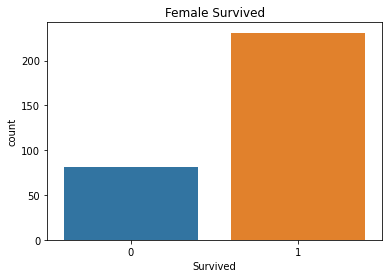

In [20]:
sns.countplot(df.Survived[df.Sex == 'female'])
plt.title("Female Survived")
plt.show()

<AxesSubplot:>

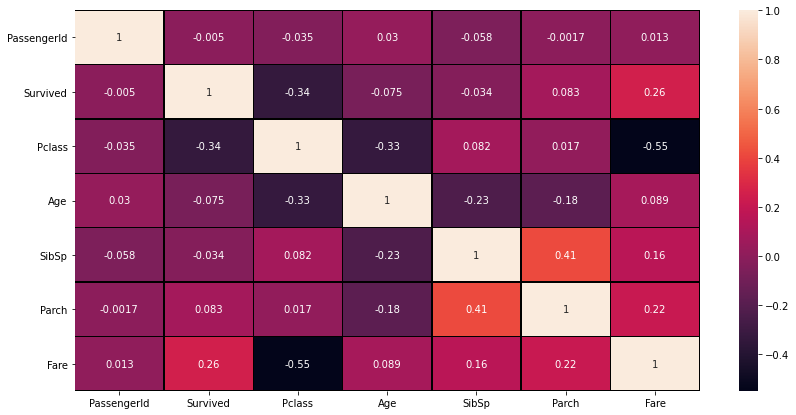

In [21]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black")

In [22]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
df.tail(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
881,882,0,3,33.000000,0,0,7.8958,1,0,1
882,883,0,3,22.000000,0,0,10.5167,0,0,1
883,884,0,2,28.000000,0,0,10.5000,1,0,1
884,885,0,3,25.000000,0,0,7.0500,1,0,1
885,886,0,3,39.000000,0,5,29.1250,0,1,0
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0
890,891,0,3,32.000000,0,0,7.7500,1,1,0


In [24]:
x = df.drop(["Survived"],axis=1)
y = df["Survived"]

In [25]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [26]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.metrics import confusion_matrix,accuracy_score

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
print(accuracy_score(y_test,predlg)*100)
print(confusion_matrix(y_test,predlg))

80.89887640449437
[[93 16]
 [18 51]]


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=42,test_size=0.20)

In [30]:
from sklearn.svm import SVC

In [31]:
svc = SVC(kernel = "rbf")         
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))

80.33707865168539
[[92 17]
 [18 51]]


In [32]:
svc = SVC(kernel = "linear")         
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))

79.7752808988764
[[89 20]
 [16 53]]


In [33]:
svc = SVC(kernel = "poly")         
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))

79.21348314606742
[[95 14]
 [23 46]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))

79.7752808988764
[[90 19]
 [17 52]]


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))

74.71910112359551
[[81 28]
 [17 52]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
predrfc = dtc.predict(x_test)
print(accuracy_score(y_test,predrfc)*100)
print(confusion_matrix(y_test,predrfc))

74.71910112359551
[[81 28]
 [17 52]]


In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred = ad.predict(x_test)
print(accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))

78.65168539325843
[[84 25]
 [13 56]]


In [41]:
svc = SVC(kernel="linear")
ad = AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
ad_pred = ad.predict(x_test)
print(accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))

78.65168539325843
[[92 17]
 [21 48]]


In [42]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(x_train,y_train)
gn_pred = gn.predict(x_test)
print(accuracy_score(y_test,gn_pred)*100)
print(confusion_matrix(y_test,gn_pred))

77.52808988764045
[[85 24]
 [16 53]]
